In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

122


In [3]:
# Create data storage

name = []
cloudiness = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []

# Get requests from Open Weather API

for city in cities:
    units="imperial"
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=" + units + "&appid=" + weather_api_key
    response = requests.get(url).json()
    
# If the city is found, store the weather data

    if response['cod'] == 200:
        name.append(response["name"])       
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])  
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        
# Include a print log of each city as it's being processed (with the city number and city name)

        print(response['id'],response['name'])
    
    

367544 Sawākin
5546220 Saint George
3883457 Lebu
2022572 Khatanga
964432 Port Alfred
2206939 Bluff
1068971 Antsohihy
2208248 Kaitangata
3445026 Vila Velha
6201424 Mataura
4035715 Avarua
363885 Wau
2224827 Ngaoundéré
2071860 Esperance
2075265 Busselton
6111862 Port Hardy
2181625 Te Anau
3443061 Chui
3661944 Tefé
3874787 Punta Arenas
4030556 Rikitea
6170031 Tuktoyaktuk
909488 Lukulu
1006984 East London
2112802 Hasaki
3366880 Hermanus
5848280 Kapaa
5122534 Jamestown
146214 Paphos
5563839 Fortuna
3921355 Challapata
1218612 Murgab
6185377 Yellowknife
4034551 Faanui
3984997 San Quintín
1015776 Bredasdorp
72181 Marzuq
3833367 Ushuaia
2017155 Saskylakh
3369157 Cape Town
2128975 Nemuro
5106841 Albany
286621 Salalah
3985710 Cabo San Lucas
5920288 Charlottetown
3372783 Ponta Delgada
3893726 Constitución
1282256 Hithadhoo
3608828 Iralaya
4513583 Hamilton
2654970 Brae
104515 Makkah al Mukarramah
1855540 Naze
556268 Ostrovnoy
5972291 Havre-St-Pierre
5746545 Portland
1054329 Vangaindrano
236901 Ouadd

In [4]:
# Create a data frame from the weather data

weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

city_weather_df = pd.DataFrame(weather_dict)


In [5]:
# View data frame
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sawākin,19.11,37.33,92.59,47,0,2.59,SD,1597700835
1,Saint George,37.10,-113.58,111.00,6,1,3.36,US,1597700803
2,Lebu,-37.62,-73.65,49.64,80,46,6.40,CL,1597700835
3,Khatanga,71.97,102.50,58.89,88,100,6.71,RU,1597700835
4,Port Alfred,-33.59,26.89,54.86,71,61,30.00,ZA,1597700836
...,...,...,...,...,...,...,...,...,...
105,Dikson,73.51,80.55,50.13,93,76,13.00,RU,1597700852
106,Martapura,-3.42,114.85,77.00,94,90,1.30,ID,1597700852
107,Thinadhoo,0.53,72.93,84.00,68,99,5.32,MV,1597700852
108,Gao,16.64,1.64,89.04,46,43,16.55,ML,1597700852


In [6]:
#  Retrieve and view the indices of cities that have humidity over 100% (if any exist)

Names = city_weather_df[city_weather_df['Humidity'] > 100 ].index

print(Names)

# Delete these rows (if any exist) and create a clean data frame

clean_city_weather_df = city_weather_df.drop(Names,inplace=False)

Int64Index([], dtype='int64')


In [7]:
# View clean city weather data frame
clean_city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sawākin,19.11,37.33,92.59,47,0,2.59,SD,1597700835
1,Saint George,37.10,-113.58,111.00,6,1,3.36,US,1597700803
2,Lebu,-37.62,-73.65,49.64,80,46,6.40,CL,1597700835
3,Khatanga,71.97,102.50,58.89,88,100,6.71,RU,1597700835
4,Port Alfred,-33.59,26.89,54.86,71,61,30.00,ZA,1597700836
...,...,...,...,...,...,...,...,...,...
105,Dikson,73.51,80.55,50.13,93,76,13.00,RU,1597700852
106,Martapura,-3.42,114.85,77.00,94,90,1.30,ID,1597700852
107,Thinadhoo,0.53,72.93,84.00,68,99,5.32,MV,1597700852
108,Gao,16.64,1.64,89.04,46,43,16.55,ML,1597700852


In [8]:
# Export the clean data frame into a cities.csv

clean_city_weather_df.to_csv(output_data_file,index=True,index_label="City_ID")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

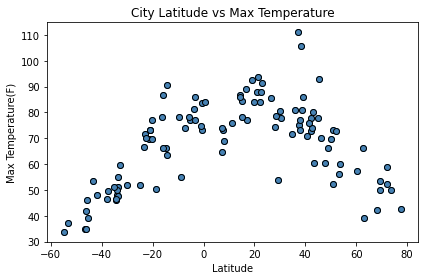

In [9]:
# Create a Scatter Plot for Latitude vs Temperature

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title("City Latitude vs Max Temperature")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig1.png")

## Latitude vs. Humidity Plot

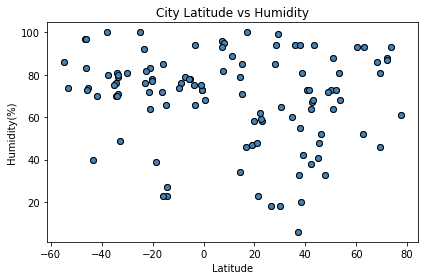

In [10]:
# Create a Scatter Plot for Latitude vs Humidity

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs Humidity")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig2.png")

## Latitude vs. Cloudiness Plot

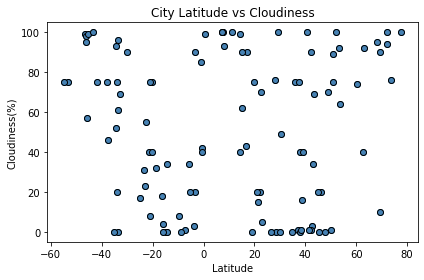

In [11]:
# Create a Scatter Plot for Latitude vs Humidity

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs Cloudiness")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig3.png")

## Latitude vs. Wind Speed Plot

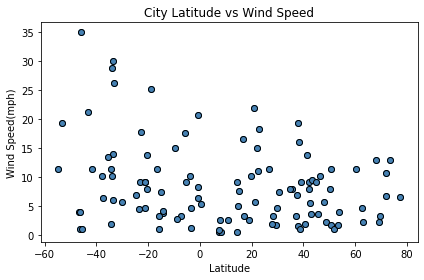

In [12]:
# Create a Scatter Plot for Latitude vs Wind Speed

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs Wind Speed")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig4.png")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

# Steps needed in the Python Function are:

# Perform a linear regression on temperature vs. latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern_clean_city_weather_df = clean_city_weather_df.loc[clean_city_weather_df["Lat"] >= 0, :]

southern_clean_city_weather_df = clean_city_weather_df.loc[clean_city_weather_df["Lat"] < 0, :]

print(northern_clean_city_weather_df)
print(southern_clean_city_weather_df)

               City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0           Sawākin  19.11   37.33     92.59        47           0   
1      Saint George  37.10 -113.58    111.00         6           1   
3          Khatanga  71.97  102.50     58.89        88         100   
11              Wau   7.70   28.00     73.17        82         100   
12       Ngaoundéré   7.32   13.58     64.54        96         100   
..              ...    ...     ...       ...       ...         ...   
103           Lapua  62.97   23.01     39.20        93          92   
104  Ledyard Center  41.44  -72.01     75.99        73           1   
105          Dikson  73.51   80.55     50.13        93          76   
107       Thinadhoo   0.53   72.93     84.00        68          99   
108             Gao  16.64    1.64     89.04        46          43   

     Wind Speed Country        Date  
0          2.59      SD  1597700835  
1          3.36      US  1597700803  
3          6.71      RU  1597700835  
11     

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression